##### Instructions
- Keep the original structure, you may add additional code cells and/or mark-down cells for clarity, legibility and/or structure.
- Add the required descriptions, explanations, justifications to the mark-down cells. You can find more mark-down tips & tricks online, for example [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) and [here](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# EXAM03: Data Science Group Assignment - Iteration 1

**Group name:** Docker commit down -m --build

**Student names & numbers:**
* Iulia Bacanu - 099559
* Shaiza Khatoon - 00099918
* Lars Loois - 101333


---

## 0. Iteration setup

Before importing anything in the File. The first step is to create a virtual enviroment via terminal. The following must be installed in order for the entire assignment to work properly (Excluing hashes)

## On Window's Powershell

In [ ]:
python3 -m venv venv # Create the virtual enviroment
.\venv\Scripts\Activate.ps1 # enter into the enviroment
pip install pandas # installing pandas

## On MacOS/Linux

In [ ]:
python3 -m venv venv # Create the virtual enviroment
source venv/bin/activate # enter into the enviroment
pip install pandas # installing pandas

In [ ]:
import sys
!{sys.executable} -m pip install pandas matplotlib

**Import libraries**

In [1]:
# CODE CELL: import the necessary libraries for this iteration

import pandas as pd
import matplotlib.pyplot as plt

**Load dataset(s)**

In [2]:
# CODE CELL: import the necessary dataset(s) for this iteration

df = pd.read_csv('Data/ships_inventory_iter1.csv', sep=',')

---

## 1. Business Understanding
*Rubric: LO 6.4D (Reflection on Process)*

**Situation description**

*Describe the Nebula Brokerage pricing problem. Why is their current "gut feeling" approach a risk?.*

**Business objective(s)**

*Justify why a data-driven baseline is needed*

**Data mining goal(s)**

*Explain what type of modeling task this is and why.*

**Success criteria**

*Determine success criteria for this iteration (the benchmark)*

---

## 2. Data Understanding
*Rubric: LO 7.3Q (Visuals) & LO 6.4C (Process)*

**Data exploration**

*Include summary statistics and descriptions of data types below. Describe your findings.*

* Ship_ID = 
* Galactic_Credits = 
* Model_Cycle = 
* Ship_Manufacturer = 
* Sector = 


In [ ]:
# CODE CELL: Show basic statistics and information
df.info() # Reciving information about the dataframe provided.

**Visualizations and patterns**

*Discover patterns in the data by creating visualizations. Create at least a histogram of Galactic_Credits. Describe your observations.*

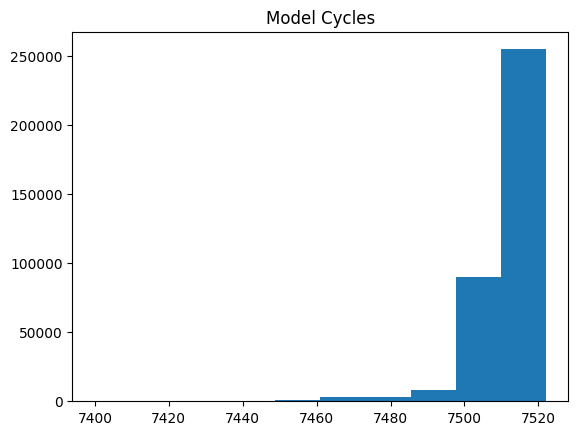

In [25]:
# CODE CELL: Generate visualizations (e.g., scatter plots, histograms)
plt.hist(x=df['Model_Cycle'])
plt.title('Model Cycles')
plt.show()

**Data insights and data quality**
* **Insights:** What are the key trends? What does the distribution look like? What does that mean? 
* **Quality issues:** Document missing values, duplicates, outliers, etc.

---

## 3. Data Preparation
*Rubric: LO 6.4C (Data Science Steps)*

**Cleaning and preprocessing**
*Describe and justify steps taken (e.g., imputation, handling outliers, fixing other errors).*

In [5]:
# CODE CELL: Data cleaning and preprocessing steps

**Adjusting dataset (optional)**
*If you adjusted the dataset for modeling in additional ways, describe that here*

In [6]:
# OPTIONAL CODE CELL: Additional preprocessing steps

---

## 4. Modeling
*Rubric: LO 6.4C (Data Science Steps)*

**Model setup**
*Describe and justify the creation of your simple benchmark model to predict Galactic_Credits*

In [7]:
# CODE CELL: Model training and setup code

**Testing and performance**
*Describe how you tested the model and interpret the metrics. Make sure to present the metrics in a clear overview.*

In [8]:
# CODE CELL: Model evaluation code

---

## 5. Evaluation
*Rubric: LO 6.4C (Results vs. Objectives)*

**Assessment against succes criteria** 
*What is the difference between the metrics? What does this mean? Did you meet the goals set in the Business Understanding?*

**Key findings and limitations**
*What did you learn? What are the limitations of this current model?*

---

## 6 Personal Contribution
*Rubric: LO 7.3P (Equal Contribution)*

| Student name | Contribution | Personal lessons learned |
| :--- | :--- | :--- |
| Iulia Bacanu | *Implemented the iteration setup* | *How to properly set up an enviroment, importing, and loading files in order to have a working assignment* |
| Shaiza Khatoon | *Contribution description* | *Personal lessons learned this iteration* |
| Lars Loois | *Contribution description* | *Personal lessons learned this iteration* |